In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
import qiskit.providers.fake_provider as fp
from qiskit.primitives import Sampler
from qiskit_algorithms import EstimationProblem, AmplitudeEstimation
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

In [2]:
p = 0.37

In [3]:
class BernoulliA(QuantumCircuit):
    """A circuit representing the Bernoulli A operator."""

    def __init__(self, probability):
        super().__init__(1)  # circuit on 1 qubit

        theta_p = 2 * np.arcsin(np.sqrt(probability))
        self.ry(theta_p, 0)

In [4]:
class BernoulliQ(QuantumCircuit):
    """A circuit representing the Bernoulli Q operator."""

    def __init__(self, probability):
        super().__init__(1)  # circuit on 1 qubit

        self._theta_p = 2 * np.arcsin(np.sqrt(probability))
        self.ry(2 * self._theta_p, 0)

    def power(self, k):
        # implement the efficient power of Q
        q_k = QuantumCircuit(1)
        q_k.ry(2 * k * self._theta_p, 0)
        return q_k

In [5]:
A = BernoulliA(p)
Q = BernoulliQ(p)

In [6]:
Q.draw()
problem = EstimationProblem(state_preparation=A,
                            grover_operator=Q,
                            objective_qubits=[0])

4개 qubit(3개 state)

In [7]:
ae = AmplitudeEstimation(num_eval_qubits=3, sampler=Sampler())

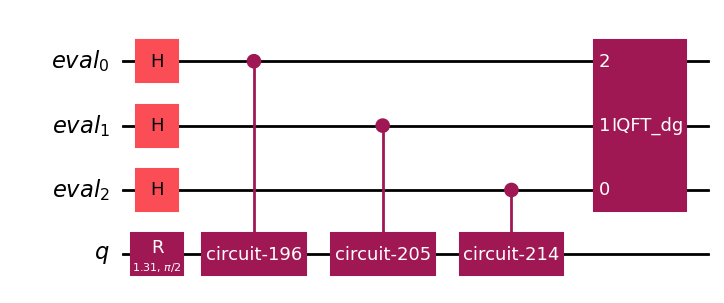

In [9]:
ae.construct_circuit(problem).decompose(reps=1).draw(output='mpl', style="iqp")

In [10]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).count_ops()['cx']

12

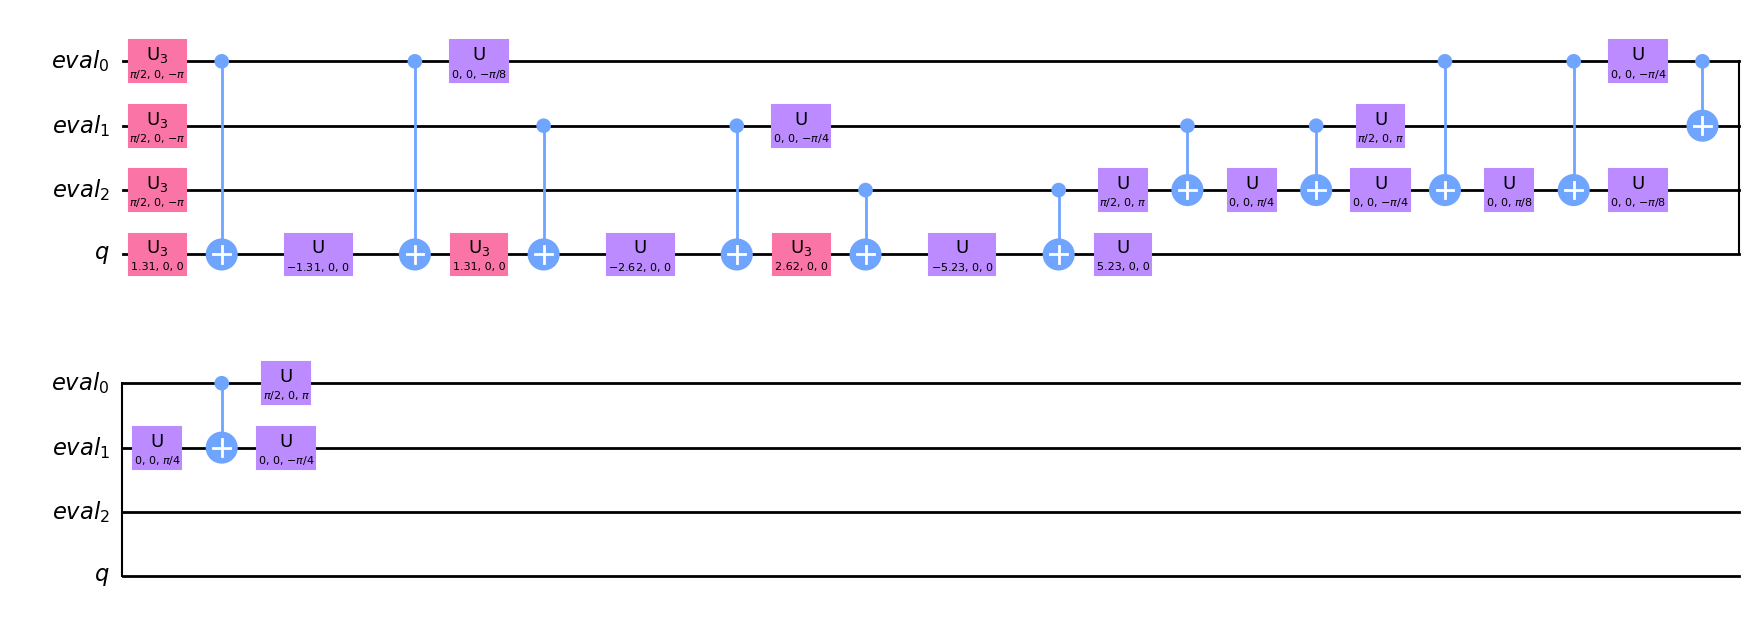

In [11]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).draw(output='mpl')

In [12]:
backend = fp.FakeYorktown()

In [13]:
transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend).count_ops()['cx']

15

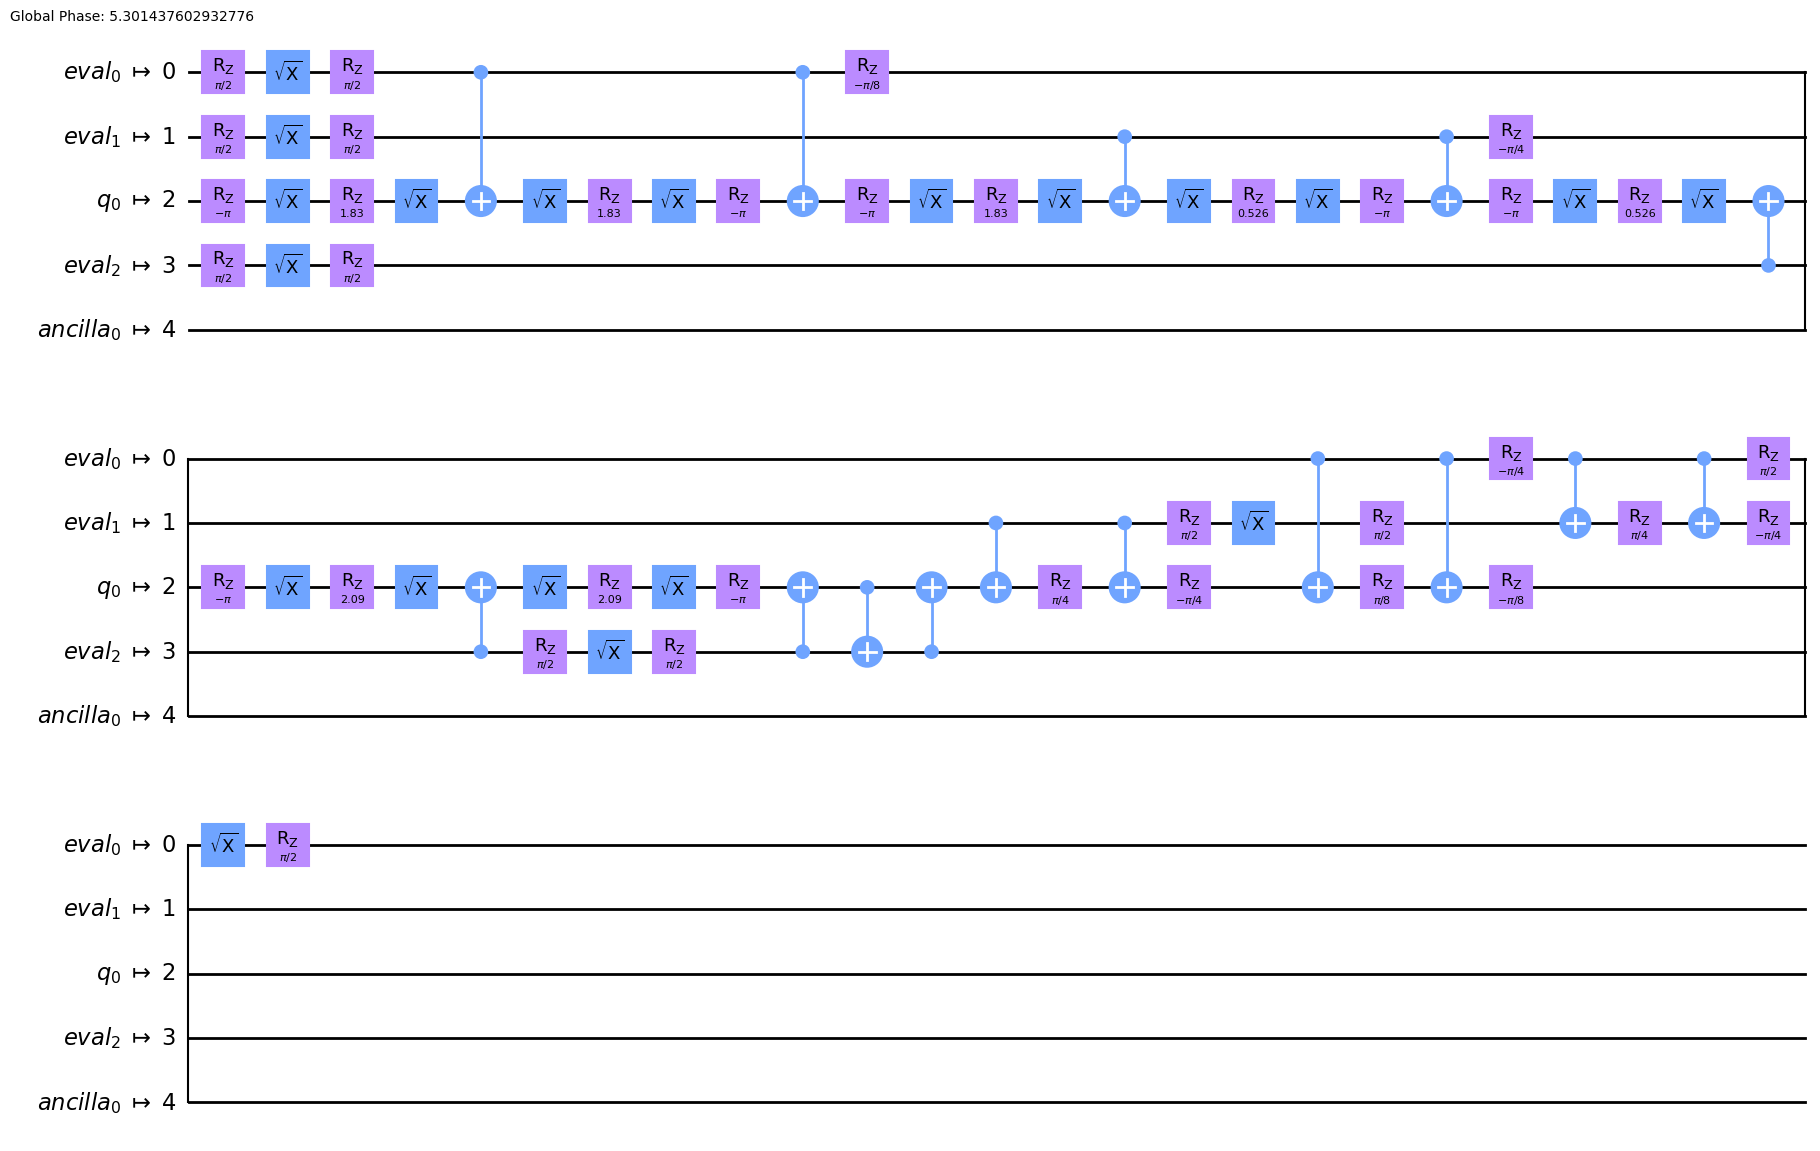

In [14]:
circuit_drawer(transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend), output='mpl')

5개 qubit(4개 state)

In [15]:
ae = AmplitudeEstimation(num_eval_qubits=4, sampler=Sampler())

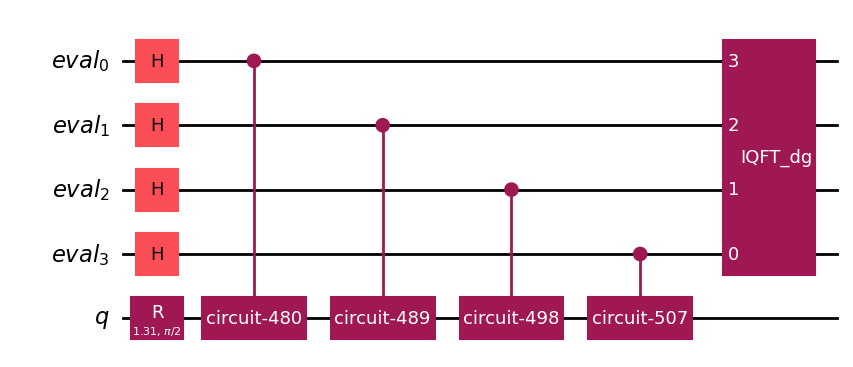

In [16]:
ae.construct_circuit(problem).decompose(reps=1).draw(output='mpl', style="iqp")

In [17]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).count_ops()['cx']

20

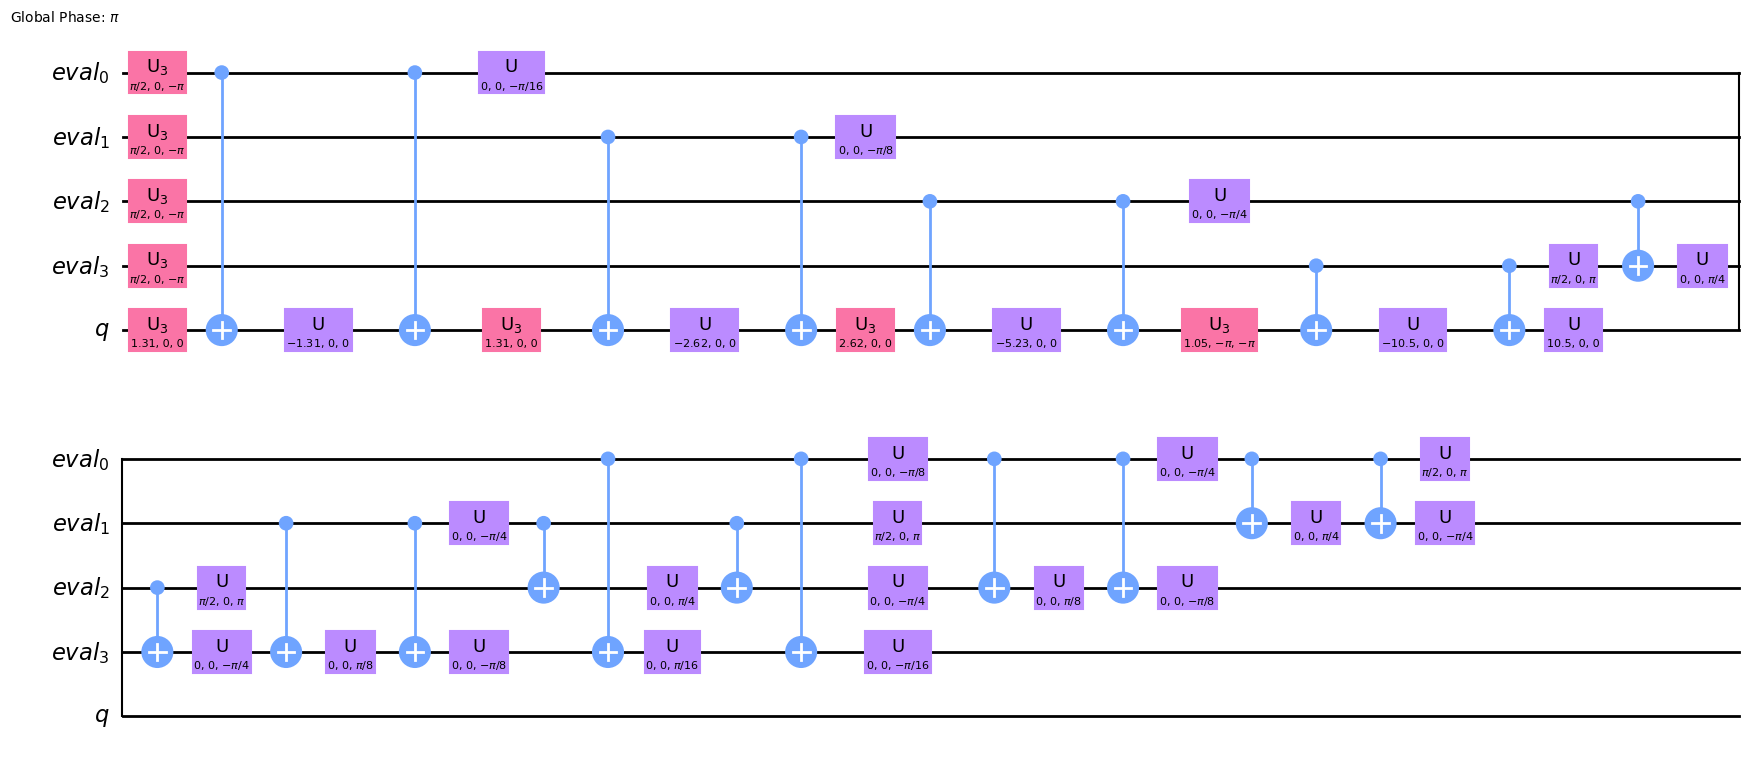

In [18]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).draw(output='mpl')

In [19]:
transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend).count_ops()['cx']

26

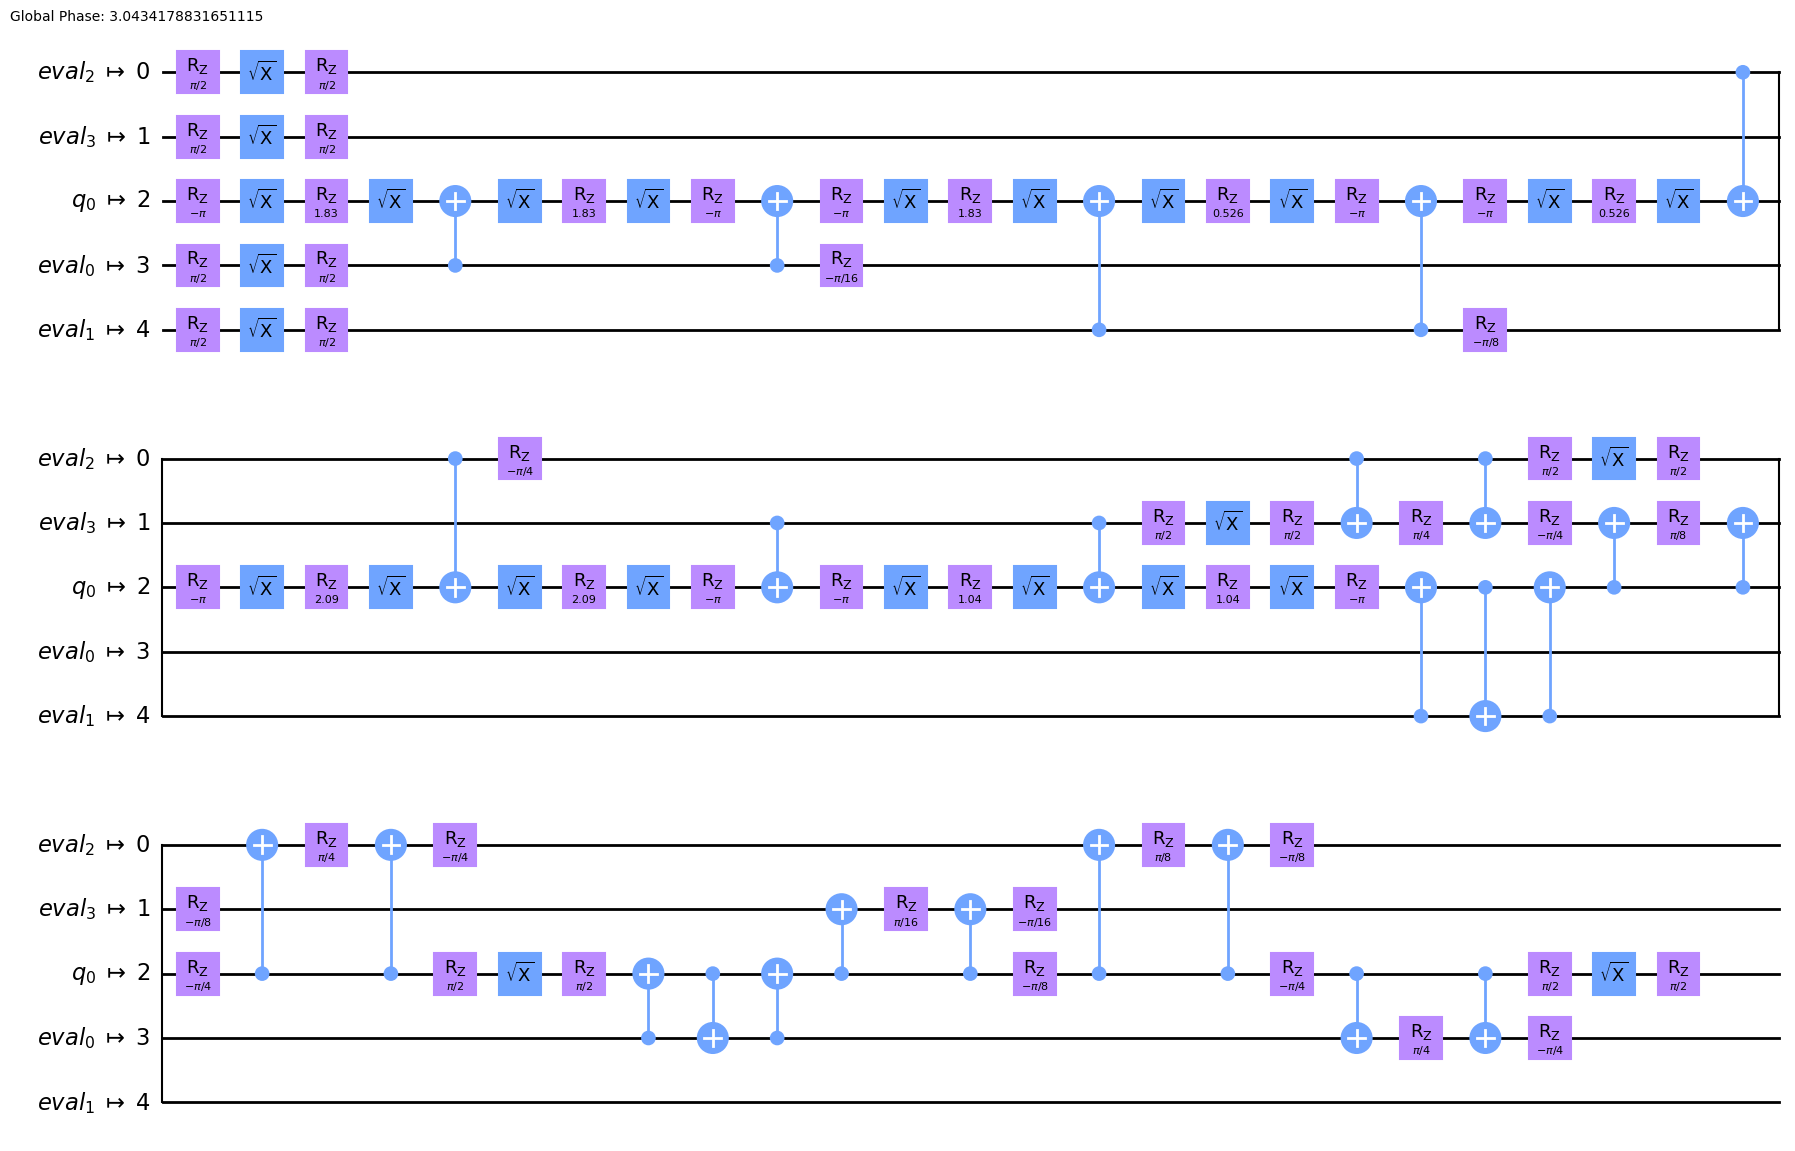

In [20]:
circuit_drawer(transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend), output='mpl')

Tokyo!

In [22]:
backend = fp.FakeTokyo()

In [23]:
ae = AmplitudeEstimation(num_eval_qubits=3, sampler=Sampler())

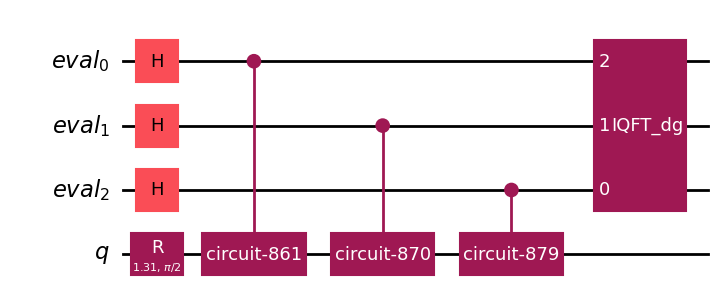

In [24]:
ae.construct_circuit(problem).decompose(reps=1).draw(output='mpl', style="iqp")

In [25]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).count_ops()['cx']

12

In [26]:
transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend).count_ops()['cx']

12

Tokyo More!

In [28]:
ae = AmplitudeEstimation(num_eval_qubits=4, sampler=Sampler())

In [29]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).count_ops()['cx']

20

In [34]:
transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend).count_ops()['cx']

23

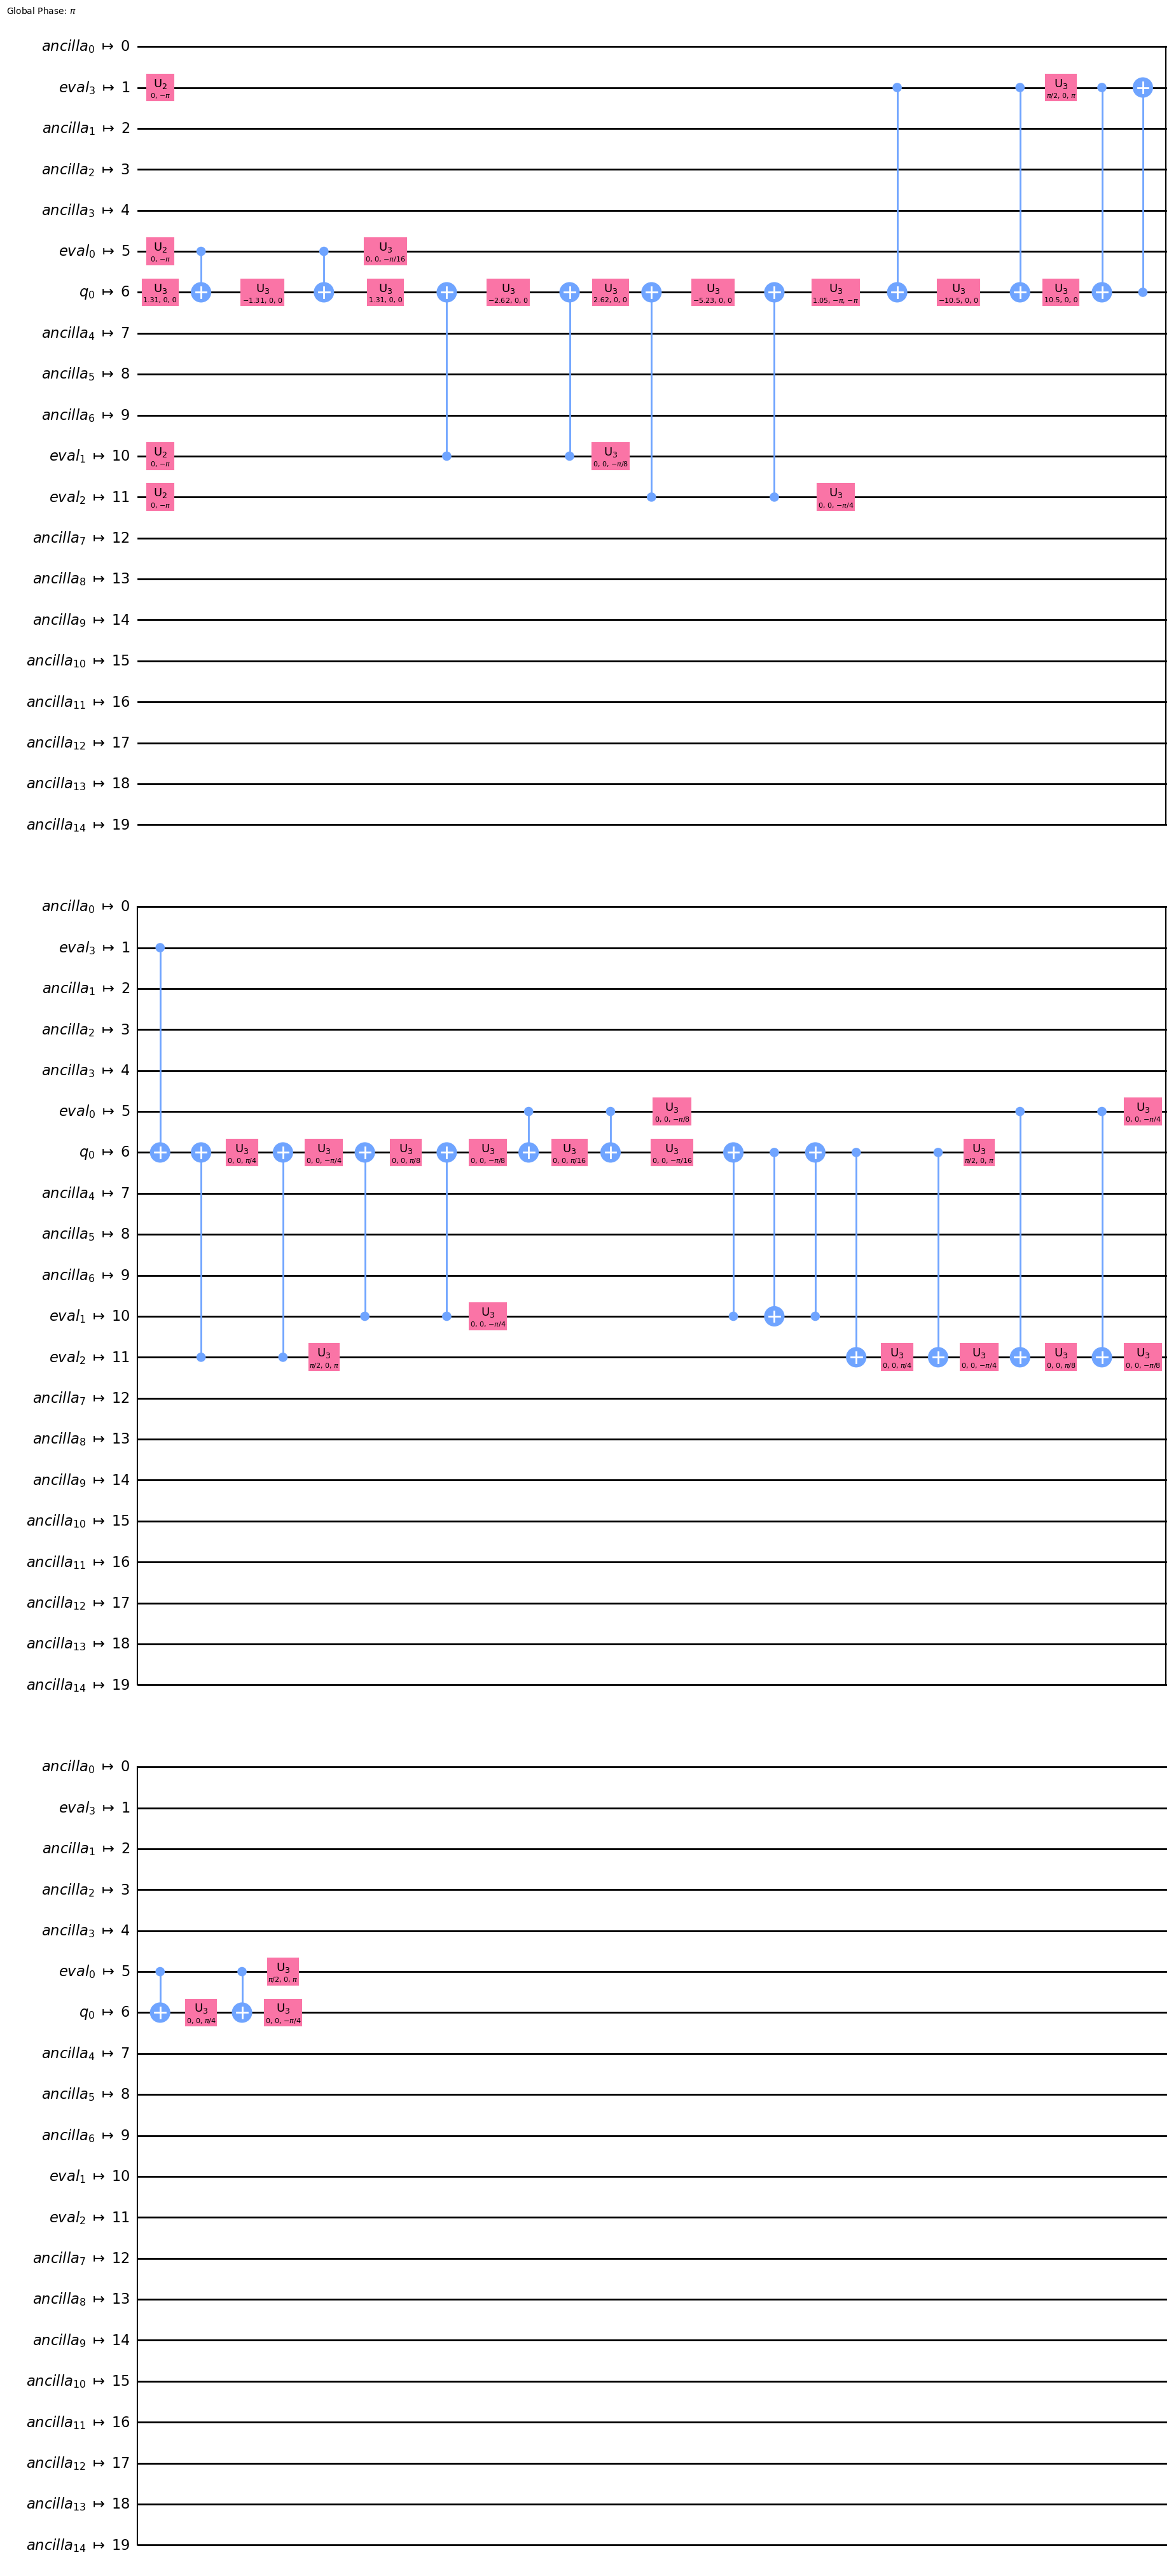

In [31]:
circuit_drawer(transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend), output='mpl')